# Lead Scoring Case Study


# Step 1: Importing and Inspecting Data

In [557]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [558]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [559]:
lead_df.shape

(9240, 37)

In [560]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [561]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [562]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Step 2: Data Cleaning and Preparation 

In [563]:
# Check the column wise null percentages.

leads_null=round((lead_df.isna().sum())/len(lead_df.index) * 100,2)
print(leads_null[leads_null > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [564]:
##Drop all the columns with more than 30% missing values
cols=lead_df.columns

for i in cols:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index))) >= 30):
        lead_df.drop(i, 1, inplace = True)

In [565]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Lets check the other remaining columns and drop columns which are not required for our analysis 

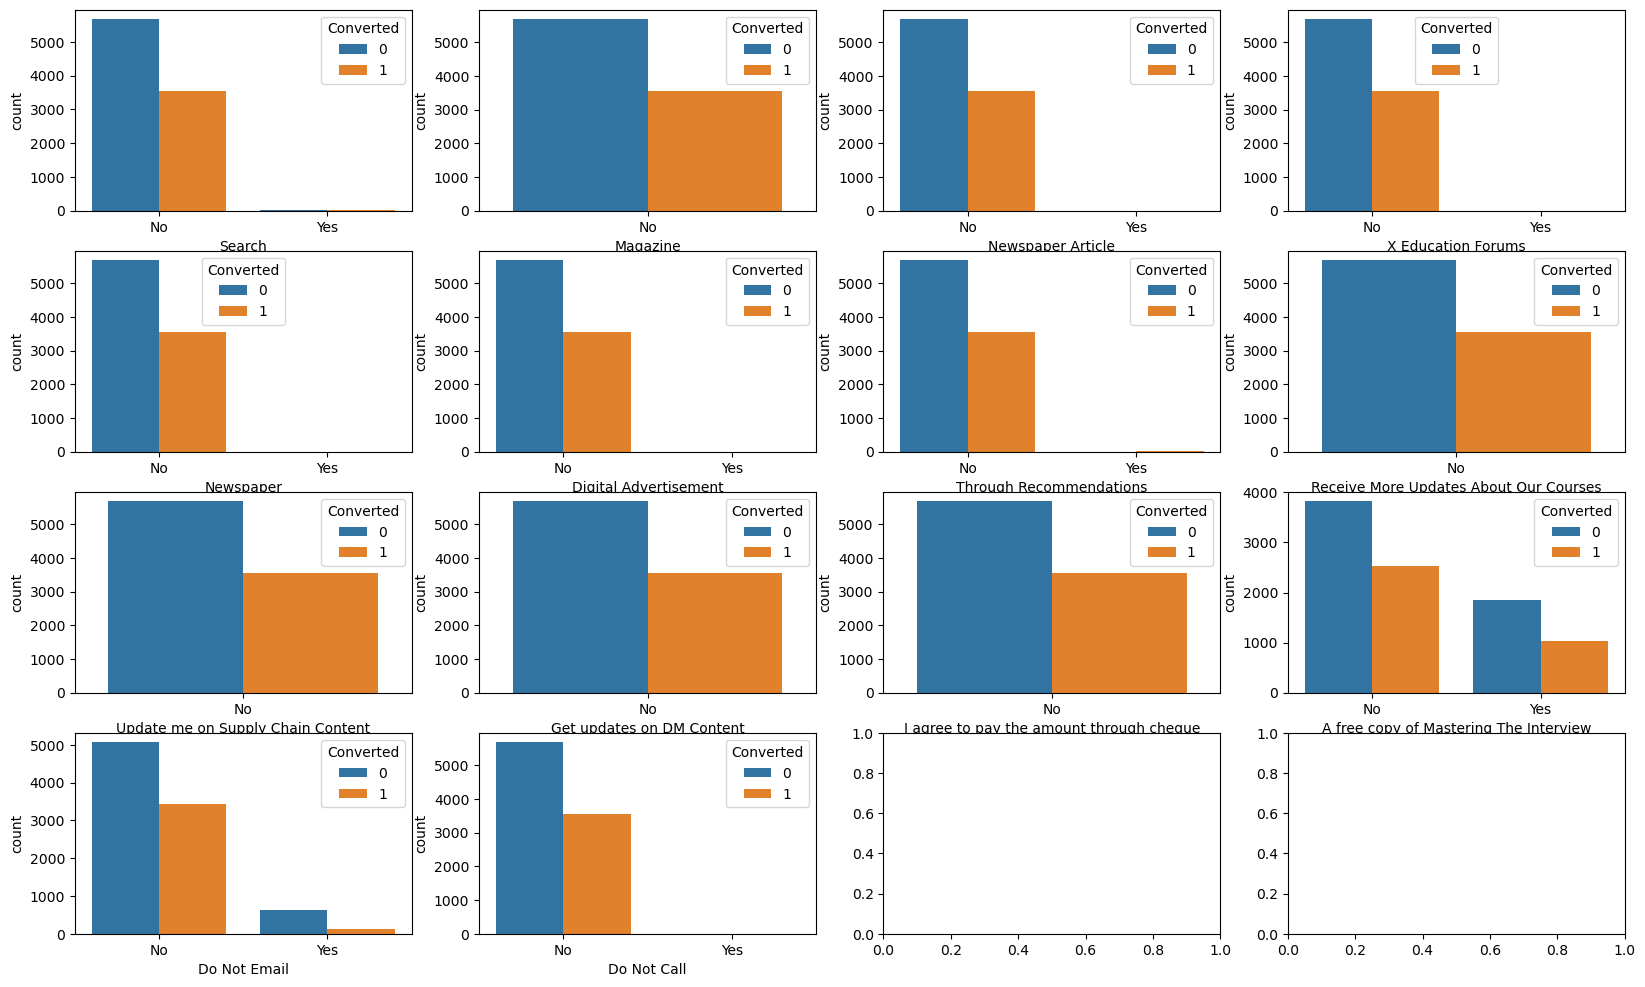

In [566]:
# Visualzing columns which contain yes or no 
fig, axs = plt.subplots(4,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = lead_df, ax = axs[0,0])
sns.countplot(x = "Magazine", hue = "Converted", data = lead_df, ax = axs[0,1])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_df, ax = axs[0,2])
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_df, ax = axs[0,3])
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_df, ax = axs[1,0])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_df, ax = axs[1,1])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_df, ax = axs[1,2])
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_df, ax = axs[1,3])
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =lead_df, ax = axs[2,0])
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_df, ax = axs[2,1])
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_df, ax = axs[2,2])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_df, ax = axs[2,3])
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df, ax = axs[3,0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df, ax = axs[3,1])
plt.show()

Since most of the above contain No as their value we can drop them

In [567]:
#Checking other columns
lead_df['Lead Source'].value_counts().head()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

Here we can impute the null values with 'Google'.

In [568]:
lead_df['TotalVisits'].value_counts().head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

Here we can impute the null values with '0.0'.

In [569]:
lead_df['Page Views Per Visit'].value_counts().head()

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

Here we can impute the null values with '0.0'.

In [570]:
lead_df['Last Activity'].value_counts().head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

Here we can impute the null values with 'Email Opened'.

In [571]:
lead_df['Country'].value_counts().head()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

Here we can impute the null values with 'India'.

In [572]:
lead_df['Specialization'].value_counts().head()

Select                       1942
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

Here we can impute 'Select' values as null

In [573]:
lead_df['How did you hear about X Education'].value_counts().head()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Name: How did you hear about X Education, dtype: int64

Here we can impute 'Select' values as null

In [574]:
lead_df['What is your current occupation'].value_counts().head()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

Here we can impute the null values as 'Unemployed'

In [575]:
lead_df['What matters most to you in choosing a course'].value_counts().head()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Here we can impute the null values as 'Better Career Prospects'

In [576]:
lead_df['Lead Profile'].value_counts().head()

Select                   4146
Potential Lead           1613
Other Leads               487
Student of SomeSchool     241
Lateral Student            24
Name: Lead Profile, dtype: int64

Here we can impute 'Select' values as null

In [577]:
lead_df['City'].value_counts().head()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Name: City, dtype: int64

Here we can impute'Select' values as null

In [578]:
# Now imputing the missing values as per their respective values.

missing_val = {'Lead Source':'Google', 'TotalVisits':'0.0', 'Page Views Per Visit':'0.0', 'Last Activity':'Email Opened', 'Country':'India',
              'What is your current occupation':'Unemployed', 
               'What matters most to you in choosing a course':'Better Career Prospects', 'City':'Select', 'Lead Profile':'Select','How did you hear about X Education':'Select',
                'Specialization':'Select'}

lead_df = lead_df.fillna(value = missing_val)

In [579]:
#Calculating Null values again
lead_df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

Since Coloumns like Specialization, How did you hear about X Education, Lead Profile have mainly 'Select' as their value we can drop them.
Also Country and City have one major value that is 'India' and 'Mumbai' we can drop them too

## Lets check a few columns and their rates of conversion of leads

## Lead Source

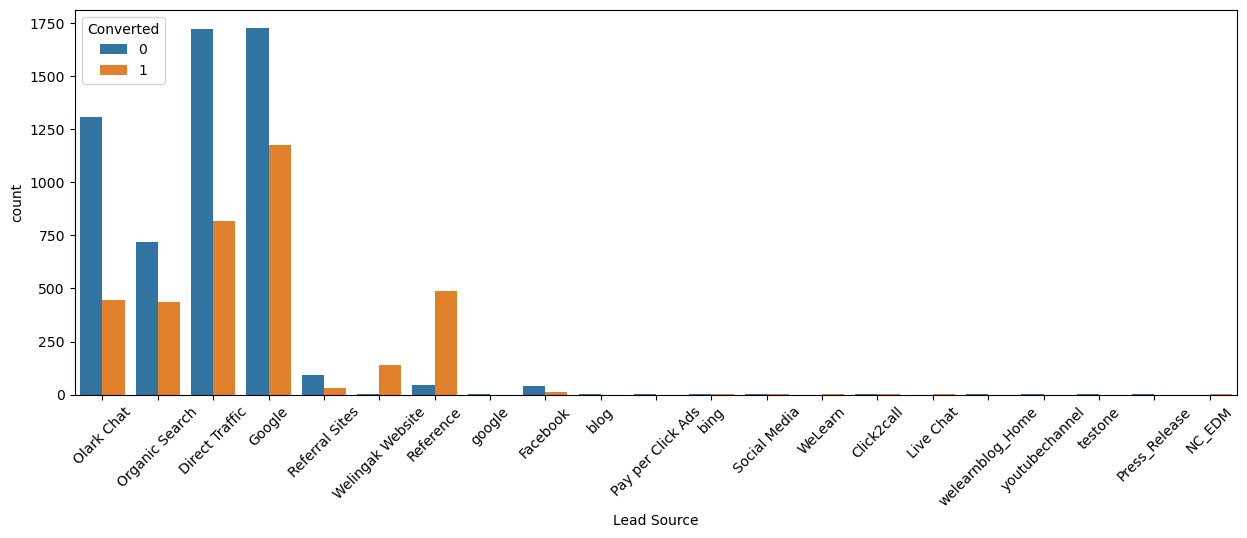

In [580]:
plt.figure(figsize=(15,5))
s=sns.countplot(x= 'Lead Source', hue='Converted' , data =lead_df)
s.set_xticklabels(s.get_xticklabels(),rotation=45)
plt.show()

Most conversions are from 'Google' and 'Direct Traffic' for 'Lead Source'

## What is your current occupation

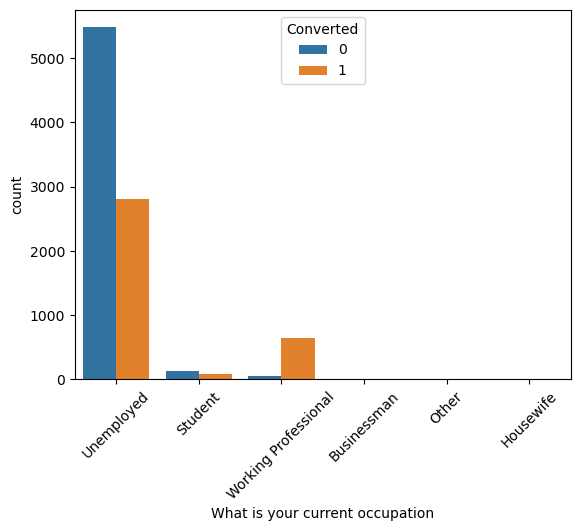

In [581]:
s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = lead_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Most leads are from 'Unemployed' but conversion is low. 'Working Professional' has high conversion rate

## What matters most to you in choosing a course

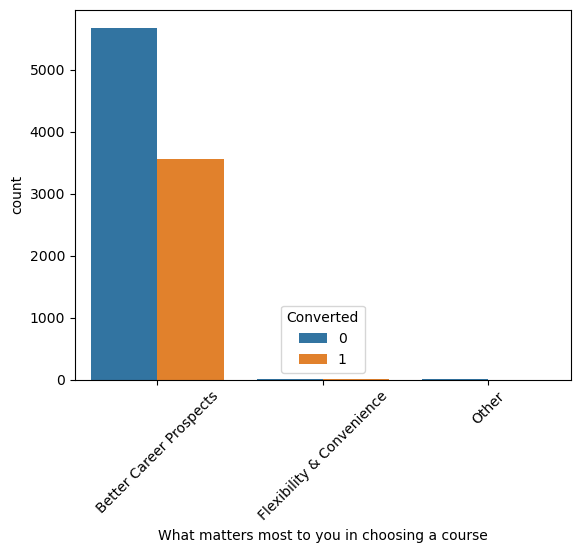

In [582]:
s2=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = lead_df)
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)
plt.show()

Highest leads as from "Better Career Prospects" and also since almost all values belong to this category, this column can be dropped.

## Last Notable Activity

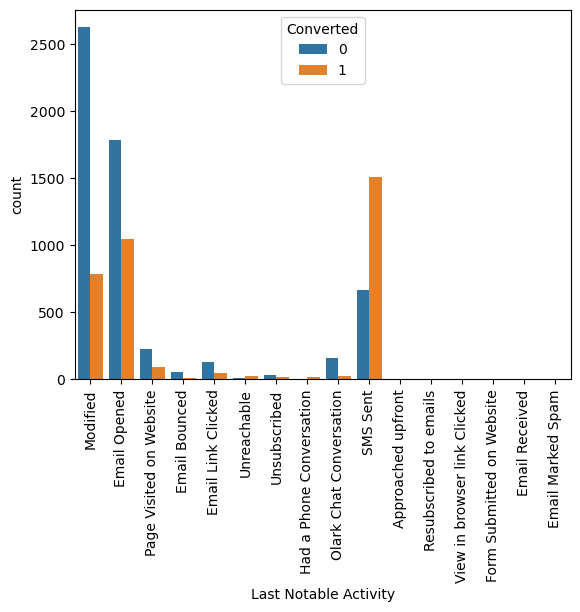

In [583]:
s3=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

'Email Opened' has very low conversion but 'SMS sent' has very good conversion.

## Lead Origin

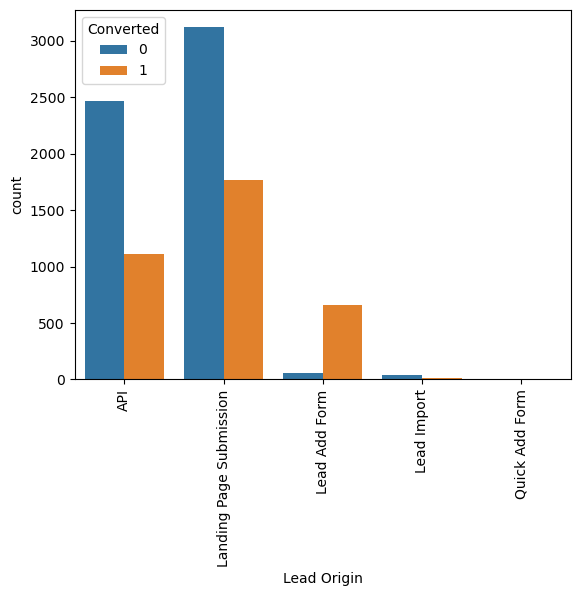

In [584]:
s4=sns.countplot(x='Lead Origin', hue='Converted' , data = lead_df)
s4.set_xticklabels(s4.get_xticklabels(),rotation=90)
plt.show()

'Lead Add Form' has good conversion while 'Landing Page Submission' generated most leads.

In [585]:
#creating a list of columns to be dropped

col_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
              'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
              'A free copy of Mastering The Interview', 'City', 'Lead Profile', 
              'How did you hear about X Education','Specialization', 'Country' , 'What matters most to you in choosing a course' ,
              'Do Not Call','Last Activity' ,'Last Notable Activity', 
              'Do Not Email' , 'Prospect ID' ,'Lead Number'])

In [586]:
lead1 = lead_df.drop(col_to_drop,1)

In [587]:
lead1.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed


In [588]:
lead1.shape

(9240, 7)

In [589]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Lead Origin                      9240 non-null   object
 1   Lead Source                      9240 non-null   object
 2   Converted                        9240 non-null   int64 
 3   TotalVisits                      9240 non-null   object
 4   Total Time Spent on Website      9240 non-null   int64 
 5   Page Views Per Visit             9240 non-null   object
 6   What is your current occupation  9240 non-null   object
dtypes: int64(2), object(5)
memory usage: 505.4+ KB


## Checking the coversion percentage of the data

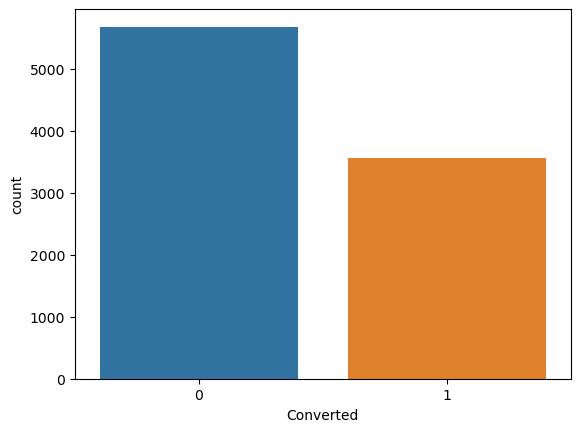

In [590]:
sns.countplot(lead1.Converted)
plt.show()

In [591]:
Conversion = (sum(lead1['Converted'])/len(lead1['Converted'].index))*100
Conversion

38.53896103896104

Converting 'TotalVisits' and 'Page views Per Visit' to float

In [592]:
lead1['TotalVisits'] = lead1['TotalVisits'].astype('float64') 
lead1['Page Views Per Visit'] = lead1['Page Views Per Visit'].astype('float64')

In [593]:
lead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Converted                        9240 non-null   int64  
 3   TotalVisits                      9240 non-null   float64
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9240 non-null   float64
 6   What is your current occupation  9240 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 505.4+ KB


In [594]:
lead1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


Checking for outliers in the numerical variables

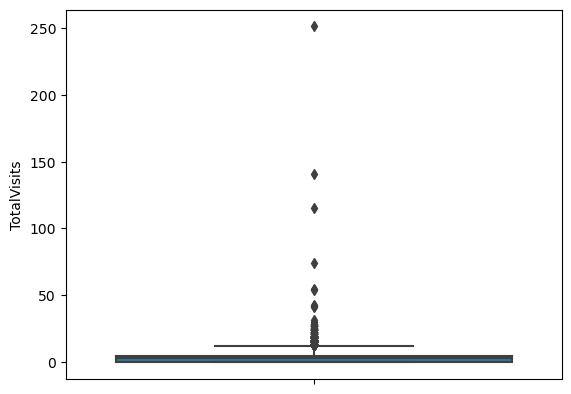

In [595]:
sns.boxplot(y=lead1['TotalVisits'])
plt.show()

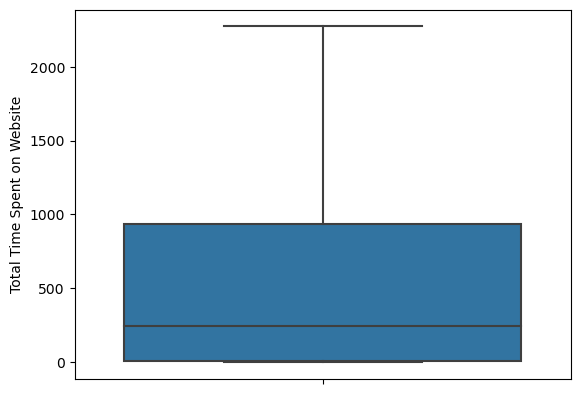

In [596]:
sns.boxplot(y=lead1['Total Time Spent on Website'])
plt.show()

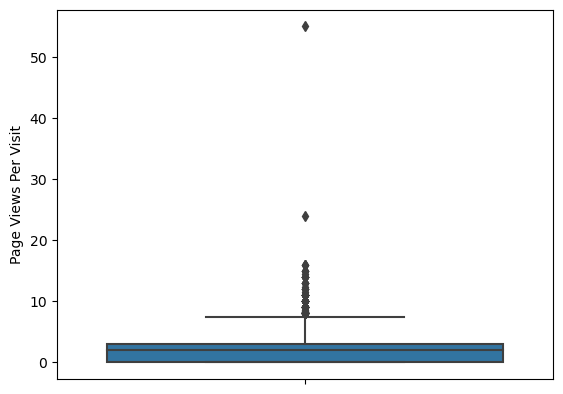

In [597]:
sns.boxplot(y=lead1['Page Views Per Visit'])
plt.show()

As we can see "TotalVisits" and "Page Views Per Visit" have outliers which need to be treated

In [598]:
num_lead = lead1[["TotalVisits","Page Views Per Visit"]]

In [599]:
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Page Views Per Visit
count,9240.000000,9240.000000
mean,3.394156,2.327787
std,4.836682,2.164258
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
90%,7.000000,5.000000
95%,10.000000,6.000000
99%,17.000000,9.000000


Since upto 95% of data is normal we can cap the above to 95%

In [600]:
percentiles = lead1['TotalVisits'].quantile([0.05,0.95]).values
lead1['TotalVisits'][lead1['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead1['TotalVisits'][lead1['TotalVisits'] >= percentiles[1]] = percentiles[1]

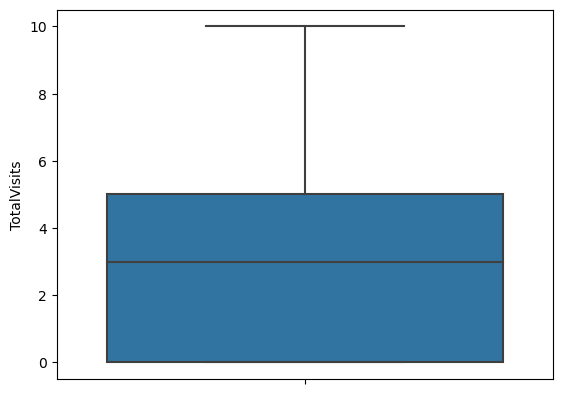

In [601]:
sns.boxplot(y=lead1['TotalVisits'])
plt.show()

In [602]:
percentiles = lead1['Page Views Per Visit'].quantile([0.05,0.95]).values
lead1['Page Views Per Visit'][lead1['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead1['Page Views Per Visit'][lead1['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

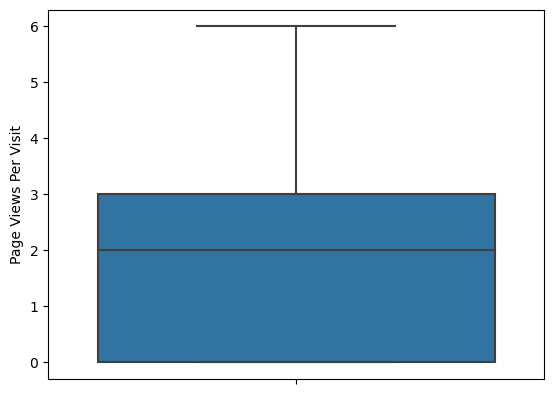

In [603]:
sns.boxplot(y=lead1['Page Views Per Visit'])
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

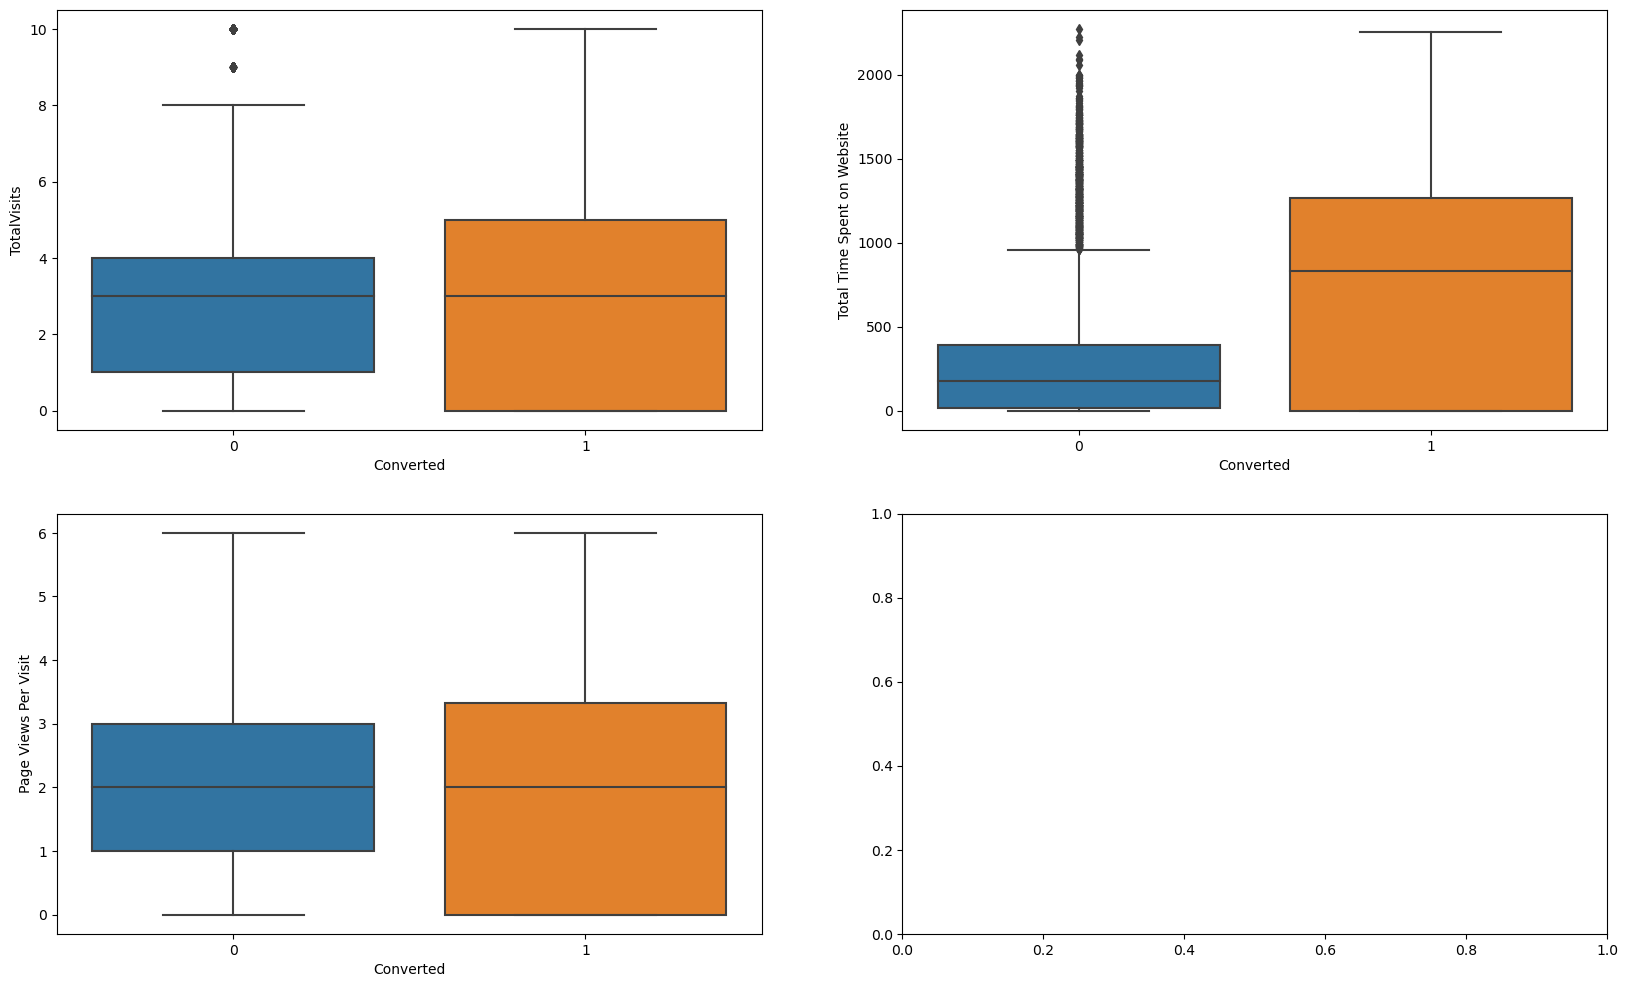

In [604]:
fig, axs = plt.subplots(2,2,figsize = (20,12))
sns.boxplot(y = "TotalVisits", x = "Converted", data = lead1, ax = axs[0,0])
sns.boxplot(y = 'Total Time Spent on Website', x = "Converted", data = lead1, ax = axs[0,1])
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead1, ax = axs[1,0])

As we can see from the above that 'Total Time Spent on Website' have higher conversion of leads, it should be focused more

### Now creating dummy variables

In [605]:
dummy1 = pd.get_dummies(lead1[['Lead Origin', 'Lead Source',"What is your current occupation"]], drop_first=True)

# Adding the results to the master dataframe
lead1 = pd.concat([lead1, dummy1], axis=1)

In [606]:
lead1.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0.0,0,0.0,Unemployed,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Unemployed,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [607]:
#Dropping the main columns of which dummies are created
lead2 = lead1.drop(['Lead Origin', 'Lead Source',"What is your current occupation"], 1)

In [608]:
lead2.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Step 3: Test-Train Split

In [609]:
X=lead2.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [610]:
y = lead2['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [611]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 4: Feature Scaling

In [612]:
scaler = StandardScaler()

X_train[["TotalVisits",'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[["TotalVisits",'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-1.121955,-0.885371,-1.234699,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0.313260,0.005716,-0.493295,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,0.672063,-0.691418,0.158918,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0.672063,1.365219,1.552535,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3934,-1.121955,-0.885371,-1.234699,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [613]:
### Checking the Converted Rate
Conversion = (sum(lead2['Converted'])/len(lead2['Converted'].index))*100
Conversion

38.53896103896104

# Step 5: Looking at Correlations

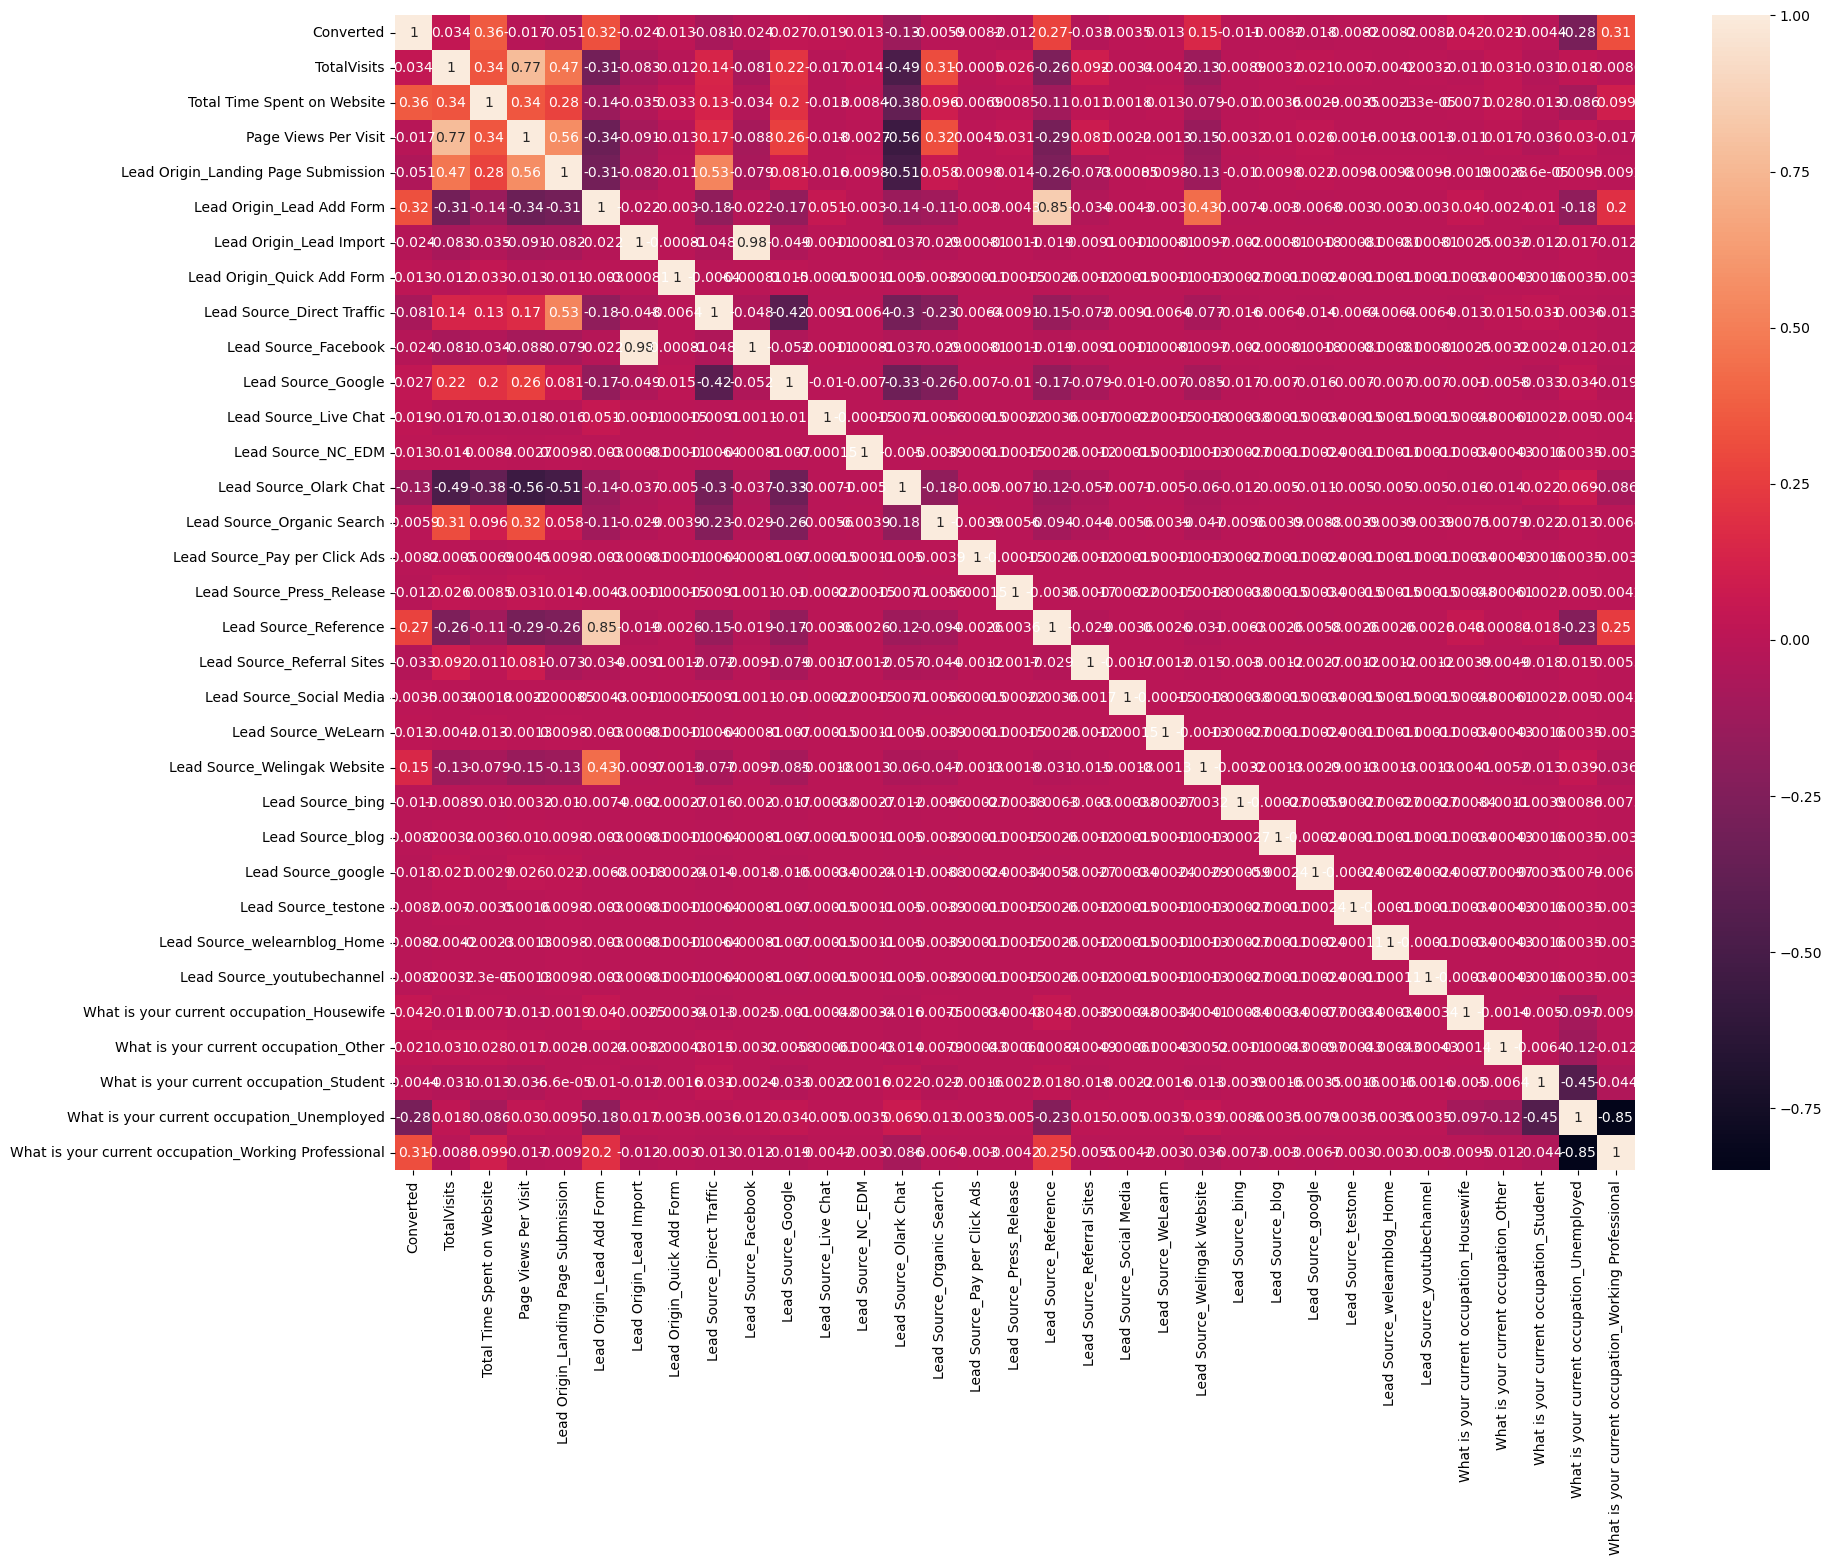

In [614]:
plt.figure(figsize = (20,15))
sns.heatmap(lead2.corr(),annot = True)
plt.show()

In [615]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission','What is your current occupation_Unemployed'],1)
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission','What is your current occupation_Unemployed'],1)

# Step 6: Model Building

In [616]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3033.5
Date:                Mon, 18 Sep 2023   Deviance:                       6067.1
Time:                        17:43:59   Pearson chi2:                 7.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3238
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2211      0.093     -2.367      0.018      -0.404      -0.038
TotalVisits                                              0.2948      0.049      6.049      0.000       0.199       0.390
Total Time Spent on Website                              1.0926      0.037     29.486      0.000       1.020       1.165
Page Views Per Visit                                    -0.1012      0.055     -1.856      0.063      -0.208       0.006
Lead Origin_Lead Add Form                                3.0877      0.453      6.820      0.000       2.200       3.975
Lead Origin_Lead Import                                  0.5407      1.963      0.275      0.783      -3.306       4.387
Lead Origin_Quick Add Form                              21.3495   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -1.2054      0.125     -9.624      0.000      -1.451      -0.960
Lead Source_Facebook                                    -1.4717      1.964     -0.749      0.454      -5.321       2.378
Lead Source_Google                                      -0.8215      0.123     -6.695      0.000      -1.062      -0.581
Lead Source_Live Chat                                   21.8726   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      22.4574   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Organic Search                              -1.0665      0.154     -6.922      0.000      -1.369      -0.765
Lead Source_Pay per Click Ads                          -22.5698   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -24.5456   4.94e+04     -0.000      1.000   -9.68e+04    9.67e+04
Lead Source_Reference                                   -0.0299      0.494     -0.061      0.952      -0.998       0.938
Lead Source_Referral Sites                              -1.5465      0.313     -4.934      0.000      -2.161      -0.932
Lead Source_Social Media                                 0.1652      1.519      0.109      0.913      -2.812       3.142
Lead Source_WeLearn                                     22.4945   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             1.9485      0.849      2.295      0.022       0.284       3.613
Lead Source_bing                                         0.1152      1.238      0.093      0.926      -2.311       2.542
Lead Source_blog                                       -23.7227   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -23

# Step 7: Feature Selection Using RFE

In [617]:
logreg = LogisticRegression()

In [618]:
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [619]:
rfe.support_

array([False,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False,  True])

In [620]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_NC_EDM', False, 2),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 6),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 15),
 ('Lead Source_welearnblog_Home', False, 3),
 ('Lead Source_youtubechannel', True, 1),
 ('What is your current oc

In [621]:
col = X_train.columns[rfe.support_]

In [622]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Quick Add Form',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'What is your current occupation_Other',
       'What is your current occupation_Student'],
      dtype='object')

##### Assessing the model

In [623]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3055.8
Date:                Mon, 18 Sep 2023   Deviance:                       6111.7
Time:                        17:44:00   Pearson chi2:                 7.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3192
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3769      0.075     -5.058      0.000      -0.523      -0.231
Total Time Spent on Website                              1.1036      0.037     30.056      0.000       1.032       1.176
Lead Origin_Lead Add Form                                3.0142      0.183     16.432      0.000       2.655       3.374
Lead Origin_Lead Import                                  0.2071      2.011      0.103      0.918      -3.733       4.148
Lead Source_Direct Traffic                              -1.0000      0.103     -9.681      0.000      -1.202      -0.798
Lead Source_Facebook                                    -1.1823      2.012     -0.588      0.557      -5.126       2.761
Lead Source_Google                                      -0.6060      0.097     -6.275      0.000      -0.795      -0.417
Lead Source_Organic Search                              -0.7518      0.120     -6.262      0.000      -0.987      -0.516
Lead Source_Press_Release                              -24.0077   5.11e+04     -0.000      1.000      -1e+05       1e+05
Lead Source_Referral Sites                              -1.2270      0.301     -4.075      0.000      -1.817      -0.637
Lead Source_Welingak Website                             1.9851      0.737      2.695      0.007       0.541       3.429
Lead Source_blog                                       -23.5791   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -23.4961   3.28e+04     -0.001      0.999   -6.42e+04    6.42e+04
Lead Source_youtubechannel                             -23.1954   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
What is your current occupation_Housewife               23.6503   2.23e+04      0.001      0.999   -4.37e+04    4.37e+04
What is your current occupation_Working Professional     2.8928      0.179     16.138      0.000       2.541       3.244
========================================================================================================================
"""

p-value of variable What is your current occupation_Housewife is high, so we can drop it.


In [624]:
col = col.drop('What is your current occupation_Housewife',1)

In [625]:
# Building Model 3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3061.8
Date:                Mon, 18 Sep 2023   Deviance:                       6123.5
Time:                        17:44:01   Pearson chi2:                 7.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3179
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3769      0.075     -5.058      0.000      -0.523      -0.231
Total Time Spent on Website                              1.1031      0.037     30.063      0.000       1.031       1.175
Lead Origin_Lead Add Form                                3.0284      0.183     16.527      0.000       2.669       3.387
Lead Origin_Lead Import                                  0.2048      2.009      0.102      0.919      -3.732       4.142
Lead Source_Direct Traffic                              -0.9971      0.103     -9.659      0.000      -1.199      -0.795
Lead Source_Facebook                                    -1.1800      2.010     -0.587      0.557      -5.120       2.760
Lead Source_Google                                      -0.6017      0.096     -6.236      0.000      -0.791      -0.413
Lead Source_Organic Search                              -0.7445      0.120     -6.209      0.000      -0.980      -0.510
Lead Source_Press_Release                              -23.0069    3.1e+04     -0.001      0.999   -6.07e+04    6.07e+04
Lead Source_Referral Sites                              -1.2267      0.301     -4.075      0.000      -1.817      -0.637
Lead Source_Welingak Website                             1.9704      0.737      2.675      0.007       0.527       3.414
Lead Source_blog                                       -22.5790   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_google                                     -22.4956   1.99e+04     -0.001      0.999    -3.9e+04    3.89e+04
Lead Source_youtubechannel                             -22.1955   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
What is your current occupation_Working Professional     2.8890      0.179     16.117      0.000       2.538       3.240
========================================================================================================================
"""

p-value of variable 'Lead Source_blog' is high, so we can drop it.

In [626]:
col = col.drop('Lead Source_blog',1)

In [627]:
# Building Model 4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3062.5
Date:                Mon, 18 Sep 2023   Deviance:                       6124.9
Time:                        17:44:01   Pearson chi2:                 7.85e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3178
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3798      0.074     -5.100      0.000      -0.526      -0.234
Total Time Spent on Website                              1.1023      0.037     30.057      0.000       1.030       1.174
Lead Origin_Lead Add Form                                3.0303      0.183     16.538      0.000       2.671       3.389
Lead Origin_Lead Import                                  0.2044      2.008      0.102      0.919      -3.732       4.141
Lead Source_Direct Traffic                              -0.9938      0.103     -9.632      0.000      -1.196      -0.792
Lead Source_Facebook                                    -1.1767      2.010     -0.585      0.558      -5.116       2.763
Lead Source_Google                                      -0.5985      0.096     -6.205      0.000      -0.788      -0.409
Lead Source_Organic Search                              -0.7413      0.120     -6.184      0.000      -0.976      -0.506
Lead Source_Press_Release                              -23.0033    3.1e+04     -0.001      0.999   -6.07e+04    6.07e+04
Lead Source_Referral Sites                              -1.2234      0.301     -4.064      0.000      -1.813      -0.633
Lead Source_Welingak Website                             1.9708      0.737      2.676      0.007       0.527       3.415
Lead Source_google                                     -22.4923   1.99e+04     -0.001      0.999    -3.9e+04    3.89e+04
Lead Source_youtubechannel                             -22.1925   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
What is your current occupation_Working Professional     2.8892      0.179     16.119      0.000       2.538       3.241
========================================================================================================================
"""

p-value of variable 'Lead Source_youtubechannel	' is high, so we can drop it.

In [628]:
col = col.drop( 'Lead Source_youtubechannel',1)

In [629]:
# Building Model 5

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3063.0
Date:                Mon, 18 Sep 2023   Deviance:                       6125.9
Time:                        17:44:01   Pearson chi2:                 7.85e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3177
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3821      0.074     -5.132      0.000      -0.528      -0.236
Total Time Spent on Website                              1.1019      0.037     30.054      0.000       1.030       1.174
Lead Origin_Lead Add Form                                3.0320      0.183     16.547      0.000       2.673       3.391
Lead Origin_Lead Import                                  0.2041      2.008      0.102      0.919      -3.732       4.140
Lead Source_Direct Traffic                              -0.9914      0.103     -9.611      0.000      -1.194      -0.789
Lead Source_Facebook                                    -1.1743      2.010     -0.584      0.559      -5.113       2.765
Lead Source_Google                                      -0.5961      0.096     -6.182      0.000      -0.785      -0.407
Lead Source_Organic Search                              -0.7389      0.120     -6.166      0.000      -0.974      -0.504
Lead Source_Press_Release                              -23.0006    3.1e+04     -0.001      0.999   -6.07e+04    6.07e+04
Lead Source_Referral Sites                              -1.2209      0.301     -4.057      0.000      -1.811      -0.631
Lead Source_Welingak Website                             1.9711      0.737      2.676      0.007       0.527       3.415
Lead Source_google                                     -22.4898   1.99e+04     -0.001      0.999    -3.9e+04    3.89e+04
What is your current occupation_Working Professional     2.8894      0.179     16.121      0.000       2.538       3.241
========================================================================================================================
"""

p-value of variable 'Lead Source_google' is high, so we can drop it.

In [630]:
col = col.drop('Lead Source_google',1)

In [631]:
# Building Model 6

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3066.3
Date:                Mon, 18 Sep 2023   Deviance:                       6132.5
Time:                        17:44:01   Pearson chi2:                 7.85e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3170
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3954      0.074     -5.318      0.000      -0.541      -0.250
Total Time Spent on Website                              1.0984      0.037     30.026      0.000       1.027       1.170
Lead Origin_Lead Add Form                                3.0406      0.183     16.595      0.000       2.681       3.400
Lead Origin_Lead Import                                  0.2019      2.007      0.101      0.920      -3.731       4.135
Lead Source_Direct Traffic                              -0.9765      0.103     -9.483      0.000      -1.178      -0.775
Lead Source_Facebook                                    -1.1595      2.008     -0.577      0.564      -5.096       2.777
Lead Source_Google                                      -0.5815      0.096     -6.040      0.000      -0.770      -0.393
Lead Source_Organic Search                              -0.7243      0.120     -6.052      0.000      -0.959      -0.490
Lead Source_Press_Release                              -20.9839   1.14e+04     -0.002      0.999   -2.24e+04    2.23e+04
Lead Source_Referral Sites                              -1.2061      0.301     -4.011      0.000      -1.796      -0.617
Lead Source_Welingak Website                             1.9729      0.737      2.678      0.007       0.529       3.417
What is your current occupation_Working Professional     2.8904      0.179     16.130      0.000       2.539       3.242
========================================================================================================================
"""

p-value of variable 'Lead Source_Press_Release' is high, so we can drop it.

In [632]:
col = col.drop('Lead Source_Press_Release' ,1)

In [633]:
# Building Model 7

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3068.1
Date:                Mon, 18 Sep 2023   Deviance:                       6136.2
Time:                        17:44:01   Pearson chi2:                 7.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3166
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4024      0.074     -5.415      0.000      -0.548      -0.257
Total Time Spent on Website                              1.0961      0.037     30.004      0.000       1.024       1.168
Lead Origin_Lead Add Form                                3.0447      0.183     16.617      0.000       2.686       3.404
Lead Origin_Lead Import                                  0.2004      2.006      0.100      0.920      -3.731       4.132
Lead Source_Direct Traffic                              -0.9684      0.103     -9.412      0.000      -1.170      -0.767
Lead Source_Facebook                                    -1.1514      2.007     -0.574      0.566      -5.085       2.783
Lead Source_Google                                      -0.5736      0.096     -5.963      0.000      -0.762      -0.385
Lead Source_Organic Search                              -0.7163      0.120     -5.990      0.000      -0.951      -0.482
Lead Source_Referral Sites                              -1.1980      0.301     -3.986      0.000      -1.787      -0.609
Lead Source_Welingak Website                             1.9739      0.737      2.680      0.007       0.530       3.418
What is your current occupation_Working Professional     2.8907      0.179     16.135      0.000       2.540       3.242
========================================================================================================================
"""

p-value of variable 'Lead Origin_Lead Import' is high, so we can drop it.

In [634]:
col = col.drop('Lead Origin_Lead Import' ,1)

In [635]:
# Building Model 8

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3068.1
Date:                Mon, 18 Sep 2023   Deviance:                       6136.2
Time:                        17:44:02   Pearson chi2:                 7.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3166
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4024      0.074     -5.416      0.000      -0.548      -0.257
Total Time Spent on Website                              1.0960      0.037     30.005      0.000       1.024       1.168
Lead Origin_Lead Add Form                                3.0447      0.183     16.617      0.000       2.686       3.404
Lead Source_Direct Traffic                              -0.9683      0.103     -9.412      0.000      -1.170      -0.767
Lead Source_Facebook                                    -0.9582      0.523     -1.832      0.067      -1.984       0.067
Lead Source_Google                                      -0.5735      0.096     -5.962      0.000      -0.762      -0.385
Lead Source_Organic Search                              -0.7163      0.120     -5.989      0.000      -0.951      -0.482
Lead Source_Referral Sites                              -1.1980      0.301     -3.986      0.000      -1.787      -0.609
Lead Source_Welingak Website                             1.9739      0.737      2.680      0.007       0.530       3.418
What is your current occupation_Working Professional     2.8907      0.179     16.135      0.000       2.540       3.242
========================================================================================================================
"""

Now since all the variables are significant we can check VIF score

In [636]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.35
7,Lead Source_Welingak Website,1.23
8,What is your current occupation_Working Profes...,1.15
0,Total Time Spent on Website,1.08
4,Lead Source_Google,1.05
2,Lead Source_Direct Traffic,1.03
5,Lead Source_Organic Search,1.01
3,Lead Source_Facebook,1.00
6,Lead Source_Referral Sites,1.00


All variables have a good value of VIF and there is no multicollinearity. Hence, we need not drop any more variables and we can proceed with making predictions using this model only.

In [637]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.202161
6795    0.203512
3516    0.238620
8105    0.627234
3934    0.202161
4844    0.972396
3297    0.128011
8071    0.994761
987     0.281632
7423    0.766417
dtype: float64

In [638]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20216128, 0.20351225, 0.23861975, 0.62723391, 0.20216128,
       0.97239601, 0.12801073, 0.99476127, 0.28163172, 0.76641675])

In [639]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.202161,1871
1,0,0.203512,6795
2,0,0.238620,3516
3,0,0.627234,8105
4,0,0.202161,3934


##### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [640]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.202161,1871,0
1,0,0.203512,6795,0
2,0,0.238620,3516,0
3,0,0.627234,8105,1
4,0,0.202161,3934,0


## Checking the Metrics (Confusion Matrix, Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value)

In [641]:
from sklearn import metrics

In [642]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3514  488]
 [ 921 1545]]


Accuracy

In [643]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7821583178726036


In [644]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Sensitivity

In [645]:
TP / float(TP+FN)

0.6265206812652068

Specificity

In [646]:
TN / float(TN+FP)

0.8780609695152424

False Positive Rate

In [647]:
print(FP/ float(TN+FP))

0.12193903048475763


Postitive Predictive Value

In [648]:
print (TP / float(TP+FP))

0.7599606492867683


Negative predictive value

In [649]:
print (TN / float(TN+ FN))

0.7923337091319053


# Step 8: Plotting the ROC Curve

In [650]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [651]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

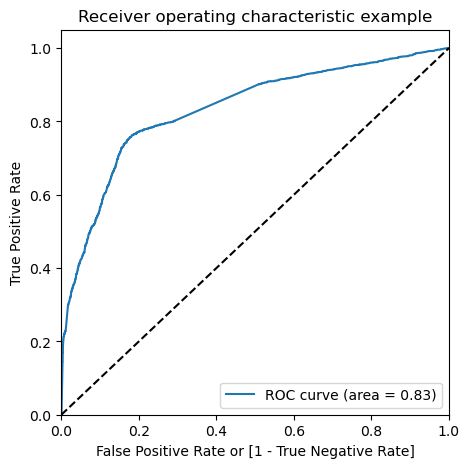

In [652]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we know that the perfect ROC Curve should be a value close to 1. We are getting a value of 0.83 indicating a good predictive model.

# Step 9: Finding Optimal Cutoff Poin

In [653]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.202161,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.203512,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.238620,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.627234,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.202161,3934,0,1,1,1,0,0,0,0,0,0,0


In [654]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.414657  0.989457  0.060470
0.2   0.2  0.646722  0.901460  0.489755
0.3   0.3  0.796846  0.761557  0.818591
0.4   0.4  0.797001  0.707624  0.852074
0.5   0.5  0.782158  0.626521  0.878061
0.6   0.6  0.767471  0.537307  0.909295
0.7   0.7  0.749691  0.431062  0.946027
0.8   0.8  0.730056  0.333333  0.974513
0.9   0.9  0.694187  0.206407  0.994753


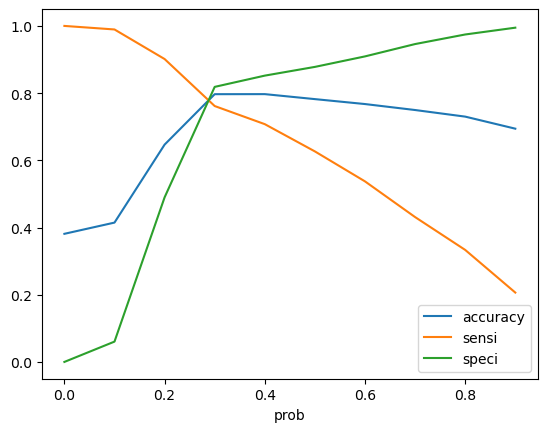

In [655]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, we see that 0.25 is the optimum point to take it as a cutoff probability.

In [656]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.202161,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.203512,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.238620,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.627234,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.202161,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [657]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.202161,1871,0,20
1,0,0.203512,6795,0,20
2,0,0.238620,3516,0,24
3,0,0.627234,8105,1,63
4,0,0.202161,3934,0,20


In [658]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1921
0     545
Name: final_Predicted, dtype: int64

In [659]:
1921/float(1921+545)

0.7789943227899432

Hence, we can see that the final prediction of conversions have a target of 78% conversion as per the X Educations CEO's requirement. Hence, we can say that this is a good model.

#### Again checking metrics of train set

Accuracy

In [660]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7806122448979592

In [661]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3128,  874],
       [ 545, 1921]], dtype=int64)

In [662]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

Sensitivity 

In [663]:
TP / float(TP+FN)

0.7789943227899432

specificity

In [664]:
TN / float(TN+FP)

0.7816091954022989

 False postive rate

In [665]:
print(FP/ float(TN+FP))

0.21839080459770116


Positive predictive value 

In [666]:
print (TP / float(TP+FP))

0.687298747763864


Negative predictive value

In [667]:
print (TN / float(TN+ FN))

0.8516199292131772


## Precision and Recall

In [668]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3128,  874],
       [ 545, 1921]], dtype=int64)

In [669]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.687298747763864

In [670]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7789943227899432

In [671]:
from sklearn.metrics import precision_score, recall_score

In [672]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.687298747763864

In [673]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7789943227899432

### Precision and recall tradeoff

In [674]:
from sklearn.metrics import precision_recall_curve

In [675]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [676]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

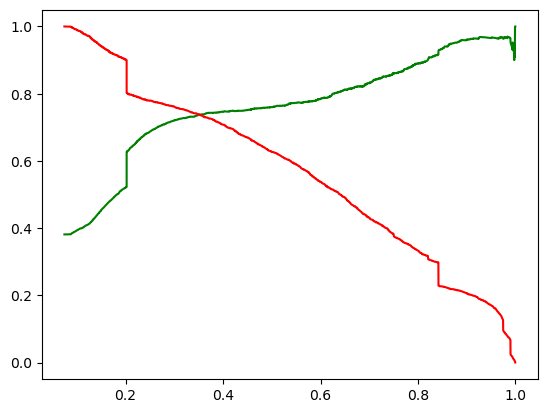

In [677]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 10: Making predictions on the test set

In [678]:
X_test[["TotalVisits",'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[["TotalVisits",'Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional
4269,1.748474,0.964504,2.109982,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2376,-1.121955,-0.885371,-1.234699,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7766,0.672063,-0.777416,1.552535,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9199,-1.121955,-0.885371,-1.234699,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4359,-1.121955,-0.885371,-1.234699,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [679]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Working Professional
4269,0.964504,0,1,0,0,0,0,0,0
2376,-0.885371,1,0,0,0,0,0,0,0
7766,-0.777416,0,0,0,1,0,0,0,1
9199,-0.885371,0,0,0,0,0,0,0,0
4359,-0.885371,1,0,0,0,0,0,0,0


In [680]:
X_test_sm = sm.add_constant(X_test)

In [681]:
y_test_pred = res.predict(X_test_sm)

In [682]:
y_test_pred[:10]

4269    0.422231
2376    0.841818
7766    0.743209
9199    0.202161
4359    0.841818
9186    0.327612
1631    0.521283
8963    0.196410
8007    0.221582
5324    0.164451
dtype: float64

In [683]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [684]:
# Let's see the head
y_pred_1.head()

,0
4269,0.422231
2376,0.841818
7766,0.743209
9199,0.202161
4359,0.841818


In [685]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [686]:
# Putting {prospect ID} to index
y_test_df['Prospect ID'] = y_test_df.index

In [687]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [688]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [689]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.422231
1,1,2376,0.841818
2,1,7766,0.743209
3,0,9199,0.202161
4,1,4359,0.841818


In [690]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [691]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4269,0.422231
1,1,2376,0.841818
2,1,7766,0.743209
3,0,9199,0.202161
4,1,4359,0.841818


In [692]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [693]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,1,4269,0.422231,1
1,1,2376,0.841818,1
2,1,7766,0.743209,1
3,0,9199,0.202161,0
4,1,4359,0.841818,1


In [694]:
## checking if 80% cases are correctly predicted based on the converted column.

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    841
0    254
Name: final_predicted, dtype: int64

In [695]:
# check the precentage of final_predicted conversions on test data

841/float(841+254)

0.7680365296803653

Hence we can see that the final prediction of conversions have a target rate of 77% (similar to predictions made on training data set)

#### Checkng Metrics 

In [696]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1306,  371],
       [ 254,  841]], dtype=int64)

In [697]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

sensitivity 

In [698]:
TP / float(TP+FN)

0.7680365296803653

specificity

In [699]:
TN / float(TN+FP)

0.7787716159809183

#### Precision and Recall metrics for the test set

In [700]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.6938943894389439

In [701]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7680365296803653

# Conclusion 

- The Accuracy, Precision and Recall score we got from the test data are in the acceptable region.
- Accuracy, Sensitivity and Specificity values of test set are around 76%, 76% and 77% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is close to 80% (i.e., 78%)
- Hence overall this model seems to be good.

# The probability expression of the model can be written as

$ ln(p/1-p) = -0.4024 + 1.0960 \times Total Time Spent on Website + 3.0447 \times Lead Origin Lead Add Formy 
- 0.9683 \times Lead Source Direct Traffic - 0.9582 \times Lead Source Facebook - 0.5735 \times Lead Source Googler - 0.7163 \times Lead Source Organic Search - 1.1980 \times Lead Source Referral Sites + 1.9739 \times Lead Source Welingak Website + 1.9739 \times What is your current occupation Working Professional $

- A customer Lead sourced by "Welingak Website" is a Hot Lead.
- A customer who is currently "Working Professional" or "Unemployed" is a Hot Lead.
- Total Time Spent on Website gets high conversion